# Introduction 
- Trong phần này, ta sẽ quan tâm tới bài toán classification, sử dụng bộ dữ liệu MNIST 
- MNIST là bộ dữ liệu bao gồm 70,000 bức ảnh viết tay (mỗi ảnh bao gồm 784 features) bởi học sinh trung học và người lao động. Mỗi bức ảnh được gán nhãn với một số mà nó biểu diễn. Bài toán MNIST được coi là bài toán mở đầu, hello world trong machine learning 



In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib as mpl 
import scipy as sp 


- Sklearn cung cấp sẵn bộ dữ liệu này 

In [2]:
from sklearn.datasets import fetch_openml 
mnist = fetch_openml('mnist_784', version = 1 )
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X, y = mnist['data'], mnist['target']
print(f"shape of X is {X.shape}")

shape of X is (70000, 784)


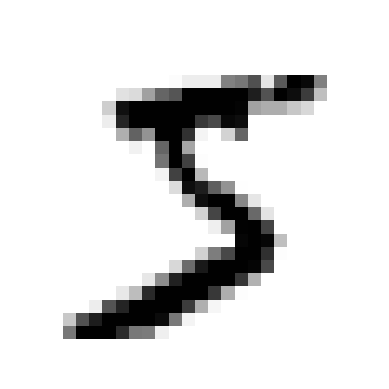

In [16]:
example_img = np.array(X.iloc[0])
example_img_show = example_img.reshape(28, 28)

plt.imshow(example_img_show, cmap = mpl.cm.binary, interpolation = 'nearest')
plt.axis("off")
plt.show()

In [17]:
y.iloc[0]

'5'

- Tập dữ liệu đã được trộn ngẫu nhiên từ trước, do đó, ta có thể lấy 60000 giá trị đầu tiên làm train set và giá trị còn lại làm test set 


In [18]:
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]


# Training a Binary Classifier 
- Trong phần này, ta thực hiện train một mô hình binary nhận dạng cho bài toán chữ viết có phải số 5 hay không ? 

In [25]:
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

- Ta lựa chọn một mô hình phân loại và huấn luyện mô hình, ta có thể sử dụng Stochastic Gradient Descent để phục vụ cho bài toán phân loại này

In [26]:
from sklearn.linear_model import SGDClassifier 

sgd_classifier = SGDClassifier(random_state= 42)
sgd_classifier.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [32]:
sgd_classifier.predict([example_img])

d:\WorkSpace_Trung\AI\Hand-on-ML\ml_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

# Performance Measures 
- Sau khi train mô hình, ta cần đánh giá được hiệu suất của mô hình, độ chính xác dựa vào một số phép đo 


## Measuring Accuracy using Cross-Validation 
- Để đánh giá độ chính xác của một mô hình, người ta sử dụng cross-validation 

In [33]:
from sklearn.model_selection import cross_val_score 

scores = cross_val_score(sgd_classifier, X_train, y_train, cv=3, scoring = "accuracy")
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.87365 0.85835 0.8689 ]


- Có thể thấy, mô hình có accuracy khá cao, tuy nhiên, bộ dữ liệu chỉ có 10% là dữ liệu bằng 5 và phân lớn là khác 5, do đó những dự đoán False toàn bộ cũng có thể có độ chính xác hơn 90% 

In [35]:
len(y[y == '5']) / len(y) 

0.09018571428571429

- Ta sẽ kiểm chứng nhận định trên bằng cách tạo ra mô hình dự đoán giá trị ngẫu nhiên 


In [36]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator): 

    def fit(self, X, y=None): 
        pass 

    def predict(self, X): 
        return np.zeros((len(X), 1), dtype=bool) 

In [37]:
never5_clf = Never5Classifier()
never5_score = cross_val_score(never5_clf, X_train, y_train_5, cv = 3, scoring = "accuracy")
print("Accuracy: {:.2f}".format(np.mean(never5_score)))

Accuracy: 0.91


=>  Có thể thấy, mô hình chỉ dự đoán giá trị 5 là false có độ chính xác lên tới 91% còn cao hơn cả mô hình dự đoán ta vừa xây dựng
- Từ đó, ta có thể rút ra rằng, accuracy không đánh giá đúng hiệu suất của mô hình

## Confusion Matrix 
- Một cách tối ưu hơn để đánh giá độ chính xác của thuật toán này đó là sử dụng confusion matrix 
- Ý tưởng đắng sau confusion matrix đó là đếm số lần instance thuộc class A được phân loại vào class B 
- Để tính toán confusion matrix, ta tính kết quả dự đoán cross validation 

In [38]:
from sklearn.model_selection import cross_val_predict 

y_train_pred = cross_val_predict(sgd_classifier, X_train, y_train_5, cv = 3 )

- Ta sẽ tính confusion matrix dựa vào predict class trên 

In [40]:
from sklearn.metrics import confusion_matrix 

conf_mtx = confusion_matrix(y_train_5, y_train_pred )
conf_mtx

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

- Từ kết quả trên, ta có thể đọc, giá trị [0][0] là dự đoán đúng của negative class, giá trị [0][1] là dự đoán sai của class negative, giá trị [1][0] là dự đoán sai của positive class và giá trị [1][1] là dự đoán đúng của positive class 
- Một mô hình chính xác hoàn toàn là khi giá trị dự đoán sai của nó (đường chéo phụ) là bằng 0

- Dựa trên confusion matrix, người ta có thể tính toán một số metrics để đánh giá 